## Compute theoretical power spectra

In [1]:
import os

os.environ['XLA_FLAGS']='--xla_gpu_cuda_data_dir=/gpfslocalsys/cuda/10.1.2'

import jax_cosmo as jc
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
cosmo = jc.Planck15()

In [4]:
z_array = np.load('../data/ktng/z_array.npy')
pz_array = np.load('../data/ktng/pz_array.npy')

In [5]:
nzs_s = jc.redshift.kde_nz(z_array, pz_array, bw=0.011)
nzs = [nzs_s]
probes = [ jc.probes.WeakLensing(nzs, sigma_e=0.26) ]

In [6]:
elle = np.logspace(1,5)
cls = jc.angular_cl.angular_cl(cosmo, elle, probes)

/linkhome/rech/genpuc01/utb76xl/.local/lib/python3.7/site-packages/jax/lax/lax.py:6193: UserWarning: Explicitly requested dtype <class 'jax.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


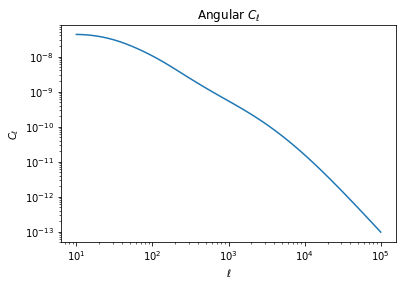

In [7]:
loglog(elle, cls[0])
ylabel(r'$C_\ell$')
xlabel(r'$\ell$');
title(r'Angular $C_\ell$');

## Compute kappaTNG maps power spectrum

In [8]:
from jax_lensing.utils import load_dataset
from jax_lensing.spectral import measure_power_spectrum

In [9]:
resolution = 0.29
map_size = 360

train_set = load_dataset("kappatng",
                         100,
                         map_size,
                         0.2,
                         "90%")

In [10]:
batch = next(train_set)

In [11]:
maps = batch['x']
maps.shape

(100, 360, 360, 1)

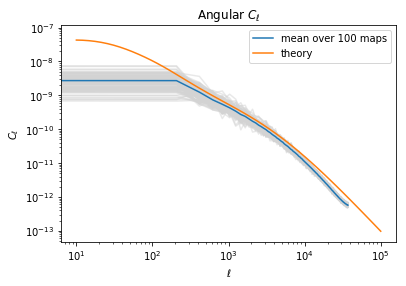

In [12]:
resolution = 0.29
pixel_size = np.pi * resolution / 180. / 60. #rad/pixel


figure(figsize=(10,5))
subplot(121)
ell_map, ps_sum = measure_power_spectrum(maps[0, ..., 0], pixel_size)
loglog(ell_map, ps_sum, alpha=0.25, c="lightgrey")
for i in range(1, maps.shape[0]):
    ell_map, ps_map = measure_power_spectrum(maps[i, ..., 0], pixel_size)
    ps_sum += ps_map
    loglog(ell_map, ps_map, alpha=.5, c="lightgrey")
    
loglog(ell_map, ps_sum/maps.shape[0], label='mean over {} maps'.format(maps.shape[0]))
loglog(elle, cls[0], label='theory')
ylabel(r'$C_\ell$')
xlabel(r'$\ell$');
title(r'Angular $C_\ell$');
legend()

subplot(121)
loglog(ell_map, ps_sum/maps.shape[0], label='mean over {} maps'.format(maps.shape[0]))
loglog(elle, cls[0], label='theory')